# <center> Creando Nuestro Propio KNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import warnings
plt.style.use("ggplot")

In [2]:
dataset = {
    "k":[[1,2],[2,3],[3,1]],
    "r":[[6,5],[7,7],[8,6]]
}
new_point = [4,4]

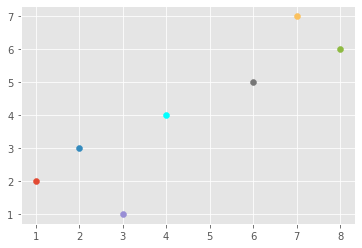

In [3]:
[[plt.scatter(point[0],point[1]) for point in dataset[key]] for key in dataset]
plt.scatter(new_point[0], new_point[1],color = "cyan")
plt.show()

In [4]:
def k_nearest_neighbors(data, predict, k = 3, verbose = True):
    if len(data)>=k:
        warnings.warn("K es un valor menor que el número total de elementos a votar.")
    distances = []
    for group in data:
        for feature in data[group]:
            # d =np.sqrt((feature[0]-predict[0])**2 + (feature[1]-predict[1])**2)
            # d = np.sqrt(np.sum((np.array(feature)-np.array(predict))**2))
            d = np.linalg.norm(np.array(feature)-np.array(predict))
            distances.append([d, group])
    
    if verbose:
        print(" ")
        print(distances)
    votes = [i[1] for i in sorted(distances)[:3]]
    if verbose:
        print(" ")
        print(votes)
    vote_result = Counter(votes)
    if verbose:
        print(" ")
        print(vote_result)
    return vote_result.most_common()[0][0]
        

In [5]:
result = k_nearest_neighbors(dataset, new_point)
result

 
[[3.605551275463989, 'k'], [2.23606797749979, 'k'], [3.1622776601683795, 'k'], [2.23606797749979, 'r'], [4.242640687119285, 'r'], [4.47213595499958, 'r']]
 
['k', 'r', 'k']
 
Counter({'k': 2, 'r': 1})


'k'

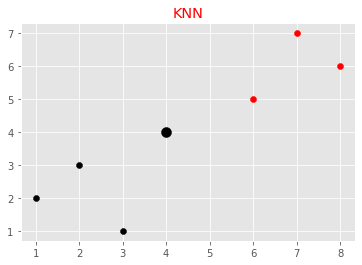

In [6]:
[[plt.scatter(i[0],i[1], color = point) for i in dataset[point]] for point in dataset]
plt.scatter(new_point[0], new_point[1], s = 100,color = result)
plt.title("KNN", color = "red")
plt.show()

## <center> Aplicando nuestro KNN al Dataset del Cáncer

In [7]:
data = pd.read_csv("../datasets/cancer/breast-cancer-wisconsin.data.txt")
data.head()

,name,v1,v2,v3,v4,v5,v6,v7,v8,v9,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [8]:
data.loc[:,:] = np.array(data.replace("?",-99999), dtype = np.float32)

In [9]:
data.drop("name", axis = 1, inplace = True)

In [10]:
full_data = data.values

In [11]:
full_data

array([[ 5.,  1.,  1., ...,  1.,  1.,  2.],
       [ 5.,  4.,  4., ...,  2.,  1.,  2.],
       [ 3.,  1.,  1., ...,  1.,  1.,  2.],
       ...,
       [ 5., 10., 10., ..., 10.,  2.,  4.],
       [ 4.,  8.,  6., ...,  6.,  1.,  4.],
       [ 4.,  8.,  8., ...,  4.,  1.,  4.]])

In [12]:
np.random.shuffle(full_data)

In [13]:
test_size = 0.2

In [14]:
train_set = {2:[], 4:[]} # Clasificación del dataset [2,4]
test_set = {2:[], 4:[]}
train_data = full_data[:int(test_size*len(full_data))]
test_data = full_data[int(test_size*len(full_data)):]

In [15]:
for i in train_data:
    train_set[i[-1]].append(i[:-1].tolist())
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [16]:
train_set

{2: [[6.0, 6.0, 6.0, 9.0, 6.0, -99999.0, 7.0, 8.0, 1.0],
  [8.0, 2.0, 1.0, 1.0, 5.0, 1.0, 1.0, 1.0, 1.0],
  [3.0, 4.0, 5.0, 3.0, 7.0, 3.0, 4.0, 6.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [6.0, 2.0, 3.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [7.0, 1.0, 2.0, 3.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 5.0, 1.0, 1.0, 1.0],
  [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0],
  [5.0, 1.0, 2.0, 10.0, 4.0, 5.0, 2.0, 1.0, 1.0],
  [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [6.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
  [3.0, 1.0

In [17]:
correct = 0
total = 0
for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k = 5, verbose = False)
        if group == vote:
            correct +=1
        total += 1
print(f"Eficiencia del KNN : {correct/total}")

Eficiencia del KNN : 0.9571428571428572
